<a href="https://colab.research.google.com/github/HLCarbon/DeepLearning/blob/main/TensorFlow_Derek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow import math
from keras. utils.vis_utils import plot_model
if(tf.config.list_physical_devices('GPU')):
  print('Yes')

### Download Data

In [2]:
nba_data = pd.read_csv('https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv')
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


### Delete Unknown Values

In [3]:
nba_data.isna().sum()
nba_data = nba_data.dropna()

### Delete unnecessary data

In [4]:
# We dont need the first and last names
nba_data_numeric = nba_data.copy()
nba_data_numeric.drop(['first_name','last_name'], axis = 1, inplace = True)
nba_data_numeric.head()

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


### Convert to float

In [5]:
# Create costum function that changes dollars/euros to floats
def clean_currency(x: pd.Series):
  if isinstance(x,str):
    return(x.replace('$','').replace('€', '').replace(',',''))
  return x

In [6]:
nba_data_numeric['salary'] = clean_currency(nba_data_numeric['salary']).astype('float')
nba_data_numeric.head()

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


In [7]:
print('data, shape:', np.shape(nba_data_numeric))
print(nba_data_numeric.describe())

data, shape: (289, 29)
             salary         age           g          gs           mp  \
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000   
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...  \
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...   
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.0000

### Box plot

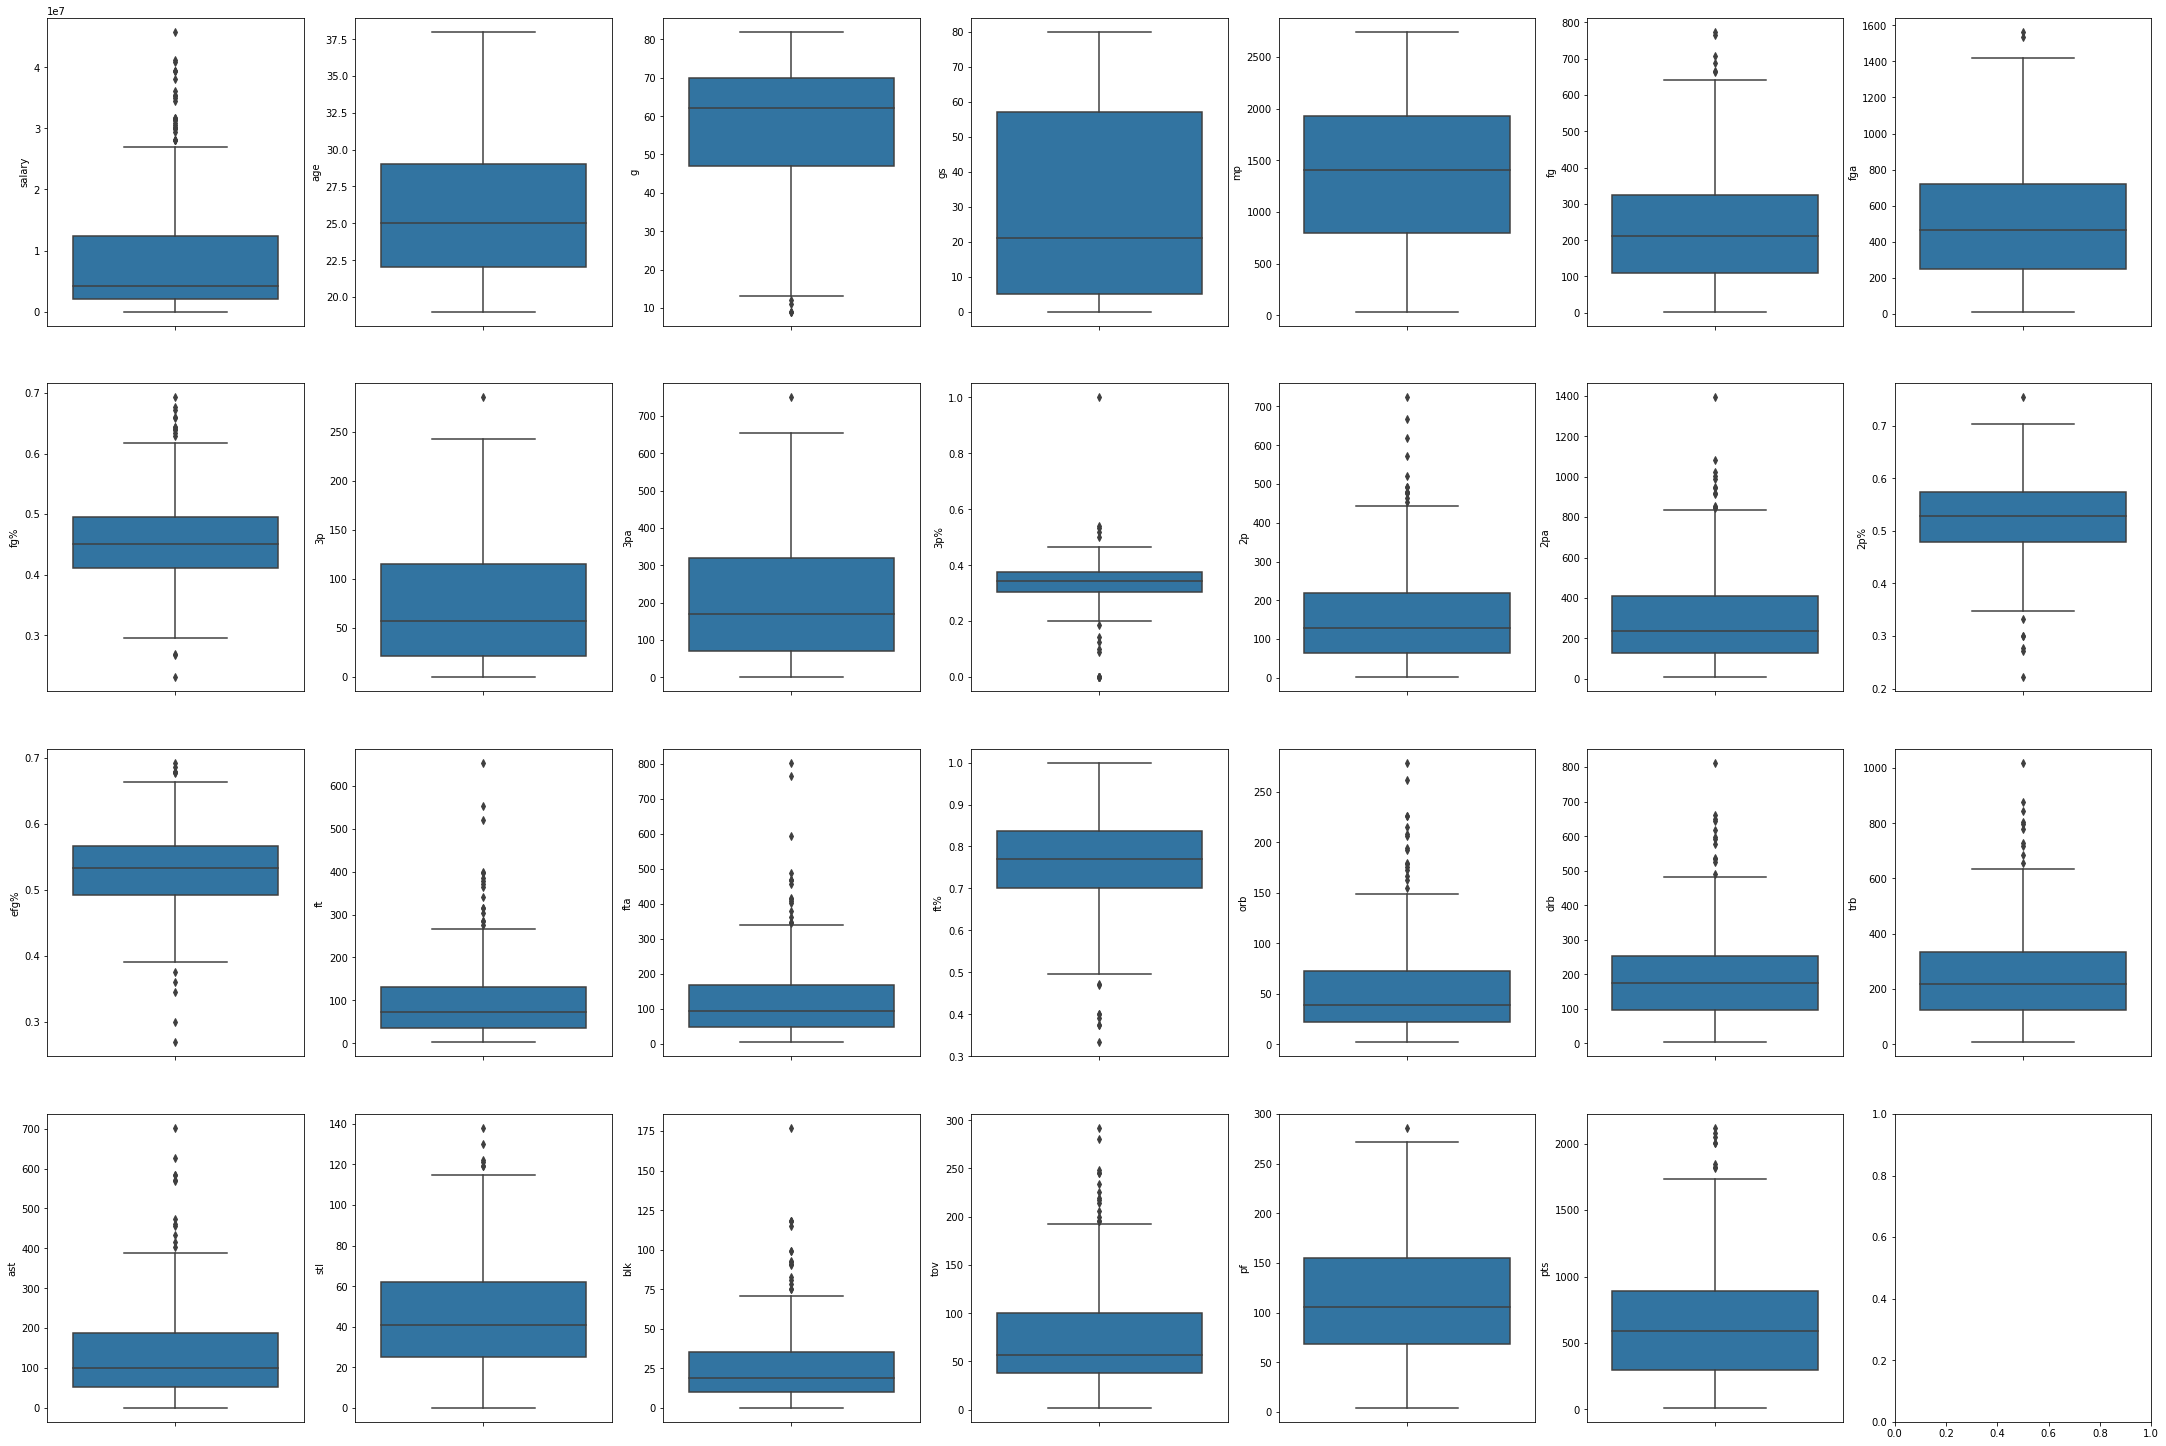

In [8]:
# visually see that if we have a lot of outliers
fig, axs = plt.subplots(ncols = 7, nrows = 4, figsize = (30,20))
index = 0
axs = axs.flatten()
nba_data_actual_numeric = nba_data_numeric.copy()
nba_data_actual_numeric.drop(['team','pos'],axis = 1, inplace = True)
for k, v in nba_data_actual_numeric.items():
  #.items() returns basically a tupple containing the columns name as k and
  # the values of that column as v
  sns.boxplot(y = k, data = nba_data_actual_numeric,ax = axs[index])
  index +=1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad=5.0)


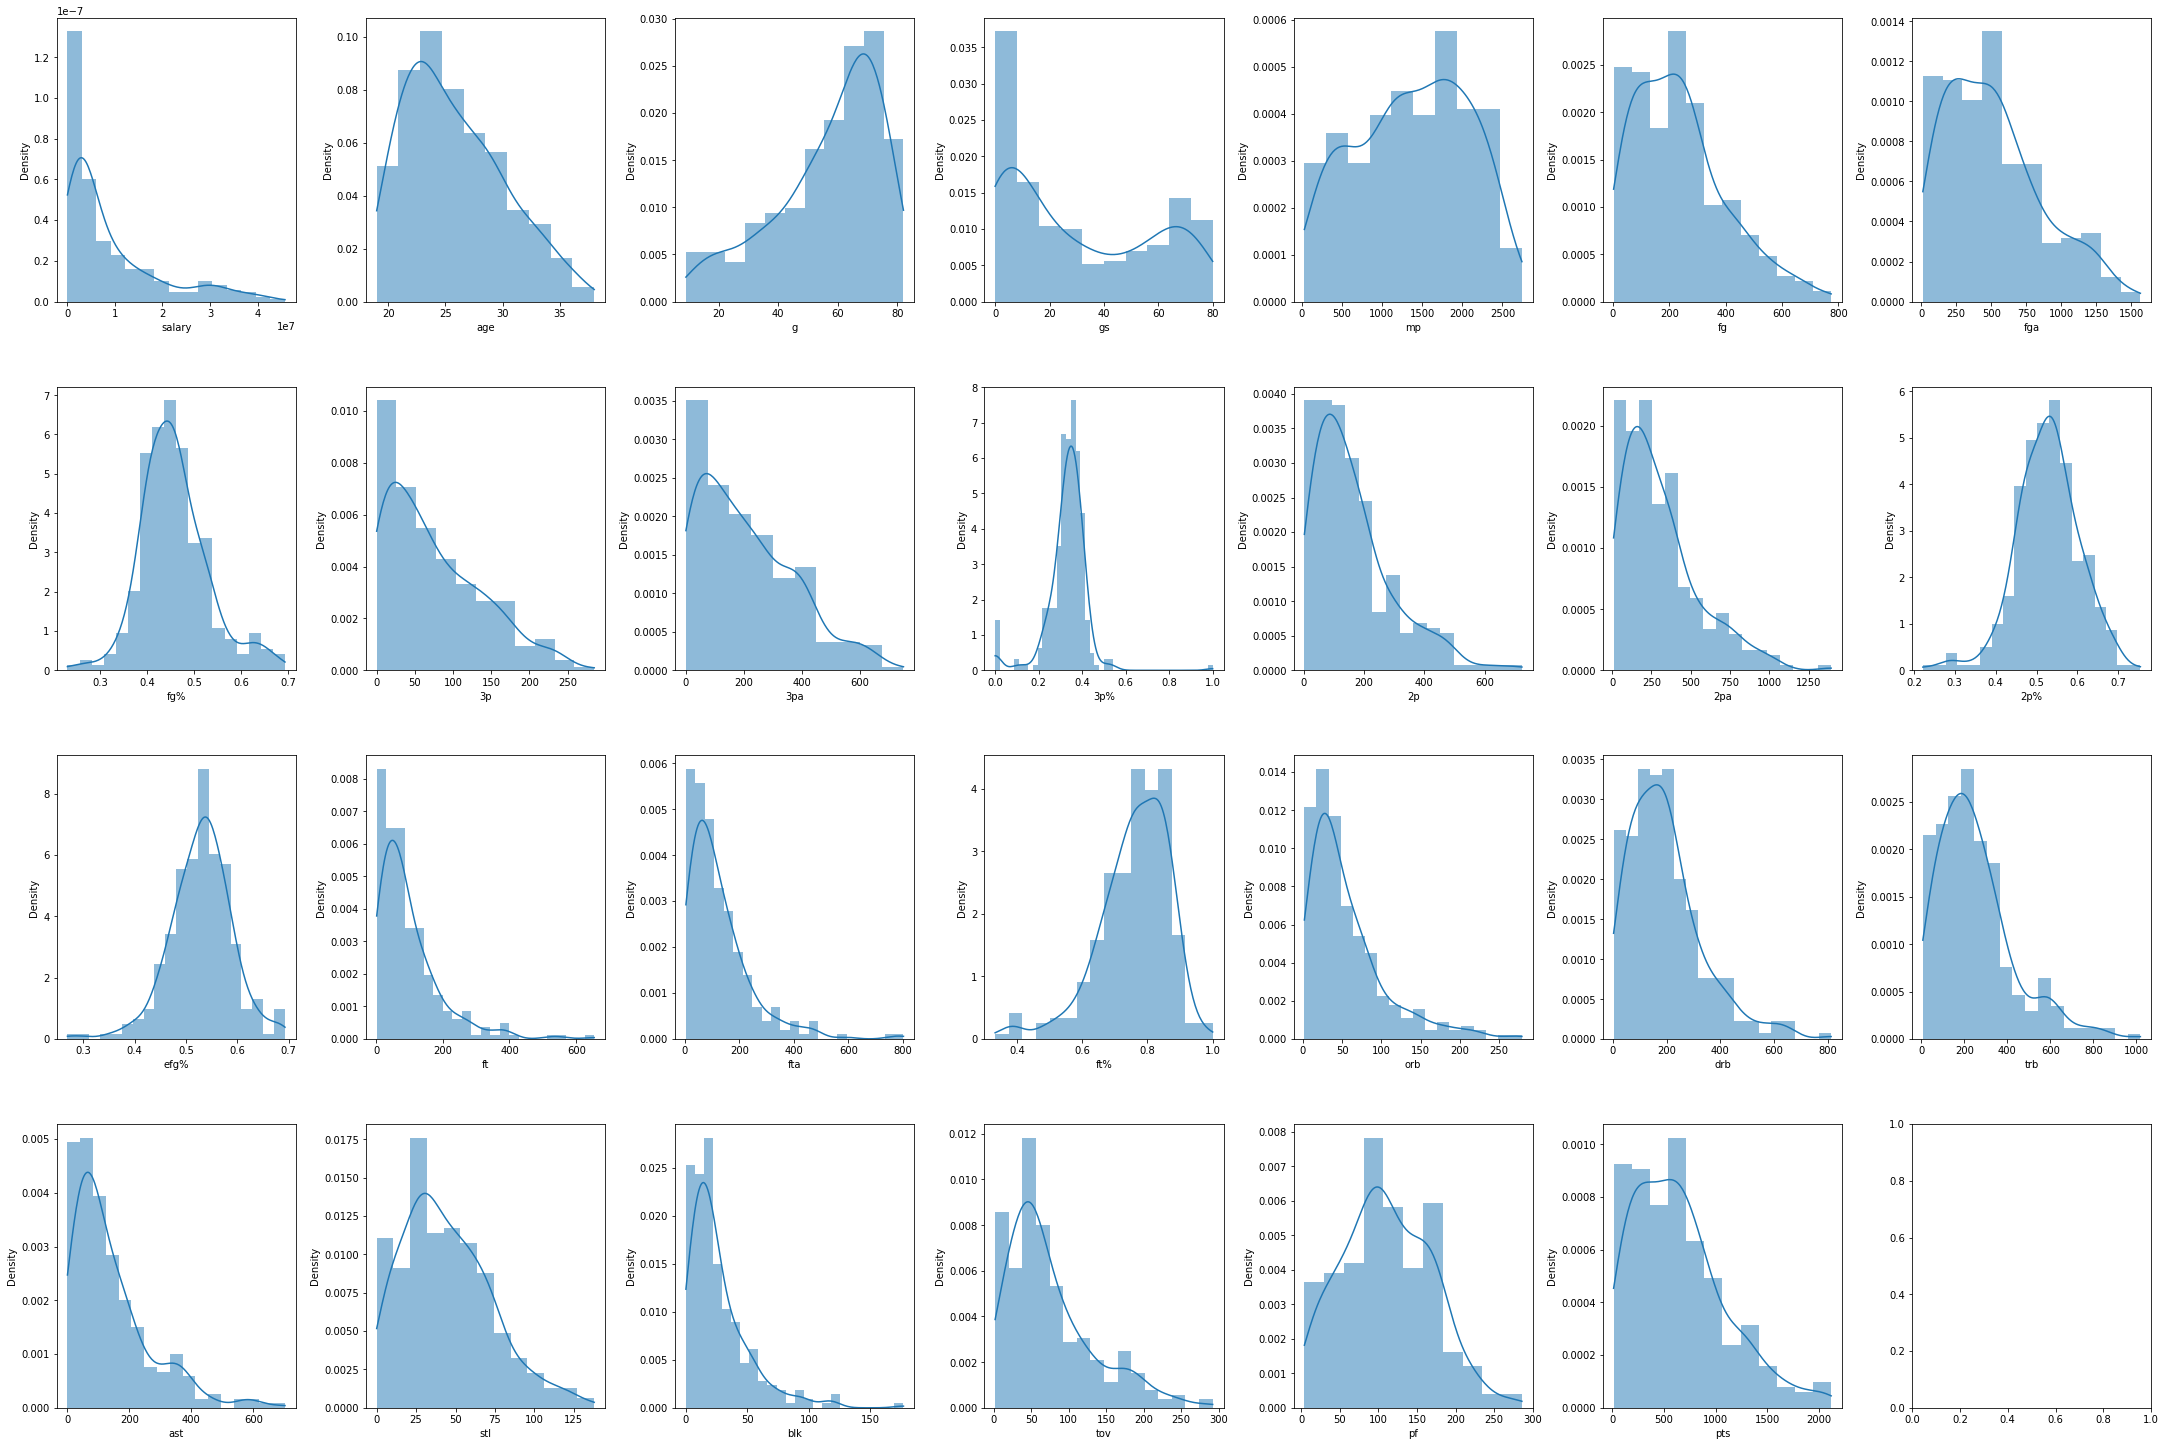

In [9]:
#Salary has alot of outliers, for fg, tp, etc.
#Make histogram plots
fig, axs = plt.subplots(nrows = 4, ncols = 7, figsize = (30,20))
index = 0
axs = axs.flatten()
for k, v in nba_data_actual_numeric.items():
  #.items() returns basically a tupple containing the columns name as k and
  # the values of that column as v
  sns.histplot(x = v, kde = True, stat = 'density', linewidth = 0, ax = axs[index])
  index +=1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad=5.0)

In [10]:
# Salary is left skewed, age, fg, 3p, etc

### Correlation Matrix

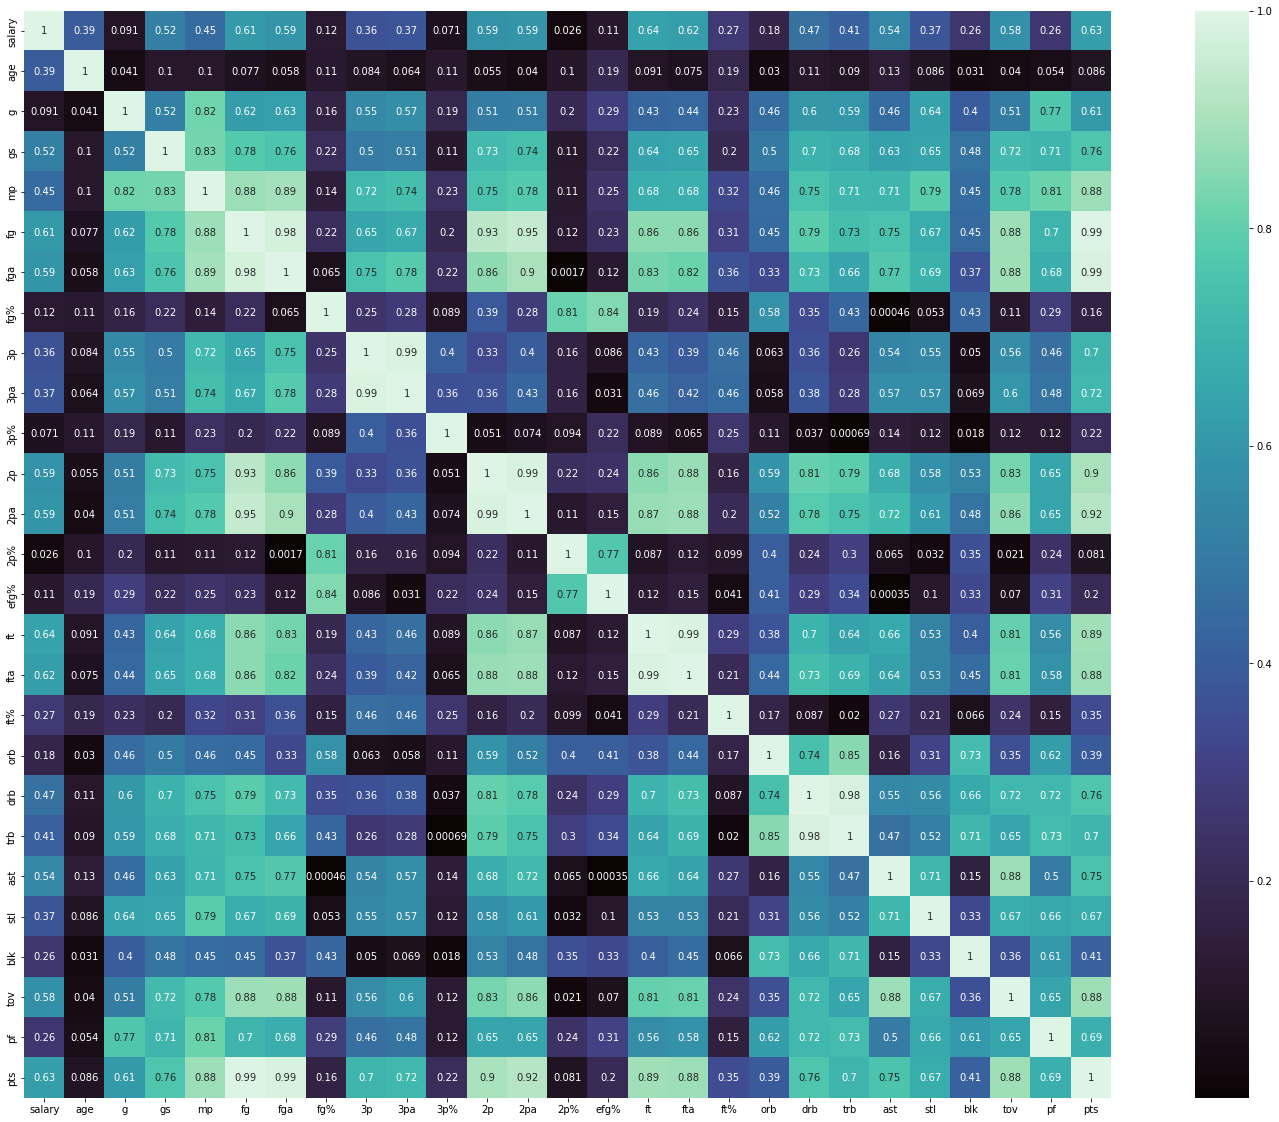

In [11]:
plt.figure(figsize = (30,20))
sns.heatmap(nba_data_actual_numeric.corr().abs(), annot = True, 
            square = True, cmap = 'mako')


### Percentage of outliers

In [12]:
def percentage_outliers(df: pd.DataFrame) -> pd.Series:
  lst_names = []
  lst_percentage = []
  for k, v in df.items():
    #First quartile
    q1 = v.quantile(0.25)
    #Third quartile
    q3 = v.quantile(0.75)
    #Interquartile range
    iqr = q3-q1
    #Calculating whiskers from boxplot
    v_col = v[(v<= q1 - 1.5*iqr) | (v>= q3 +1.5*iqr)]
    #percentage of outliers
    perc = np.shape(v_col)[0]/np.shape(df)[0]*100
    print('%s Outliers = %.2f%%' % (k, perc))
    lst_percentage.append(perc)
    lst_names.append(k)
  return pd.Series(data = lst_percentage, index = lst_names)

percentage_outliers(nba_data_actual_numeric)

  

salary Outliers = 9.69%
age Outliers = 0.00%
g Outliers = 1.73%
gs Outliers = 0.00%
mp Outliers = 0.00%
fg Outliers = 2.08%
fga Outliers = 0.69%
fg% Outliers = 4.84%
3p Outliers = 0.35%
3pa Outliers = 0.35%
3p% Outliers = 6.57%
2p Outliers = 4.50%
2pa Outliers = 4.15%
2p% Outliers = 2.42%
efg% Outliers = 3.81%
ft Outliers = 5.54%
fta Outliers = 5.54%
ft% Outliers = 2.77%
orb Outliers = 5.54%
drb Outliers = 4.15%
trb Outliers = 3.46%
ast Outliers = 4.15%
stl Outliers = 2.08%
blk Outliers = 5.54%
tov Outliers = 4.84%
pf Outliers = 0.35%
pts Outliers = 2.77%


salary    9.688581
age       0.000000
g         1.730104
gs        0.000000
mp        0.000000
fg        2.076125
fga       0.692042
fg%       4.844291
3p        0.346021
3pa       0.346021
3p%       6.574394
2p        4.498270
2pa       4.152249
2p%       2.422145
efg%      3.806228
ft        5.536332
fta       5.536332
ft%       2.768166
orb       5.536332
drb       4.152249
trb       3.460208
ast       4.152249
stl       2.076125
blk       5.536332
tov       4.844291
pf        0.346021
pts       2.768166
dtype: float64

### Tensorflow Neural Network Regressions

#### Tensors

In [13]:
scalar = tf.constant(5)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=5>

Create a vector

In [14]:
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

Create a matrix

In [15]:
matrix = tf.constant([[1,2],
                      [3,4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

Create a tensor

In [16]:
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                      [[7,8,9],
                       [10,11,12]]])
tensor

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

Create Tensor that can be changed

In [17]:
v_tensor = tf.Variable([5,6])
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 6], dtype=int32)>

Get and change values

In [18]:
print('Index 0 :', v_tensor[0])
v_tensor[0].assign(8)
v_tensor

Index 0 : tf.Tensor(5, shape=(), dtype=int32)


<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([8, 6], dtype=int32)>

Random Tensors

In [19]:
rand_tensor = tf.random.Generator.from_seed(66)
rand_tensor = rand_tensor.normal(shape = (3,2), mean = 0, stddev = 1.0)
rand_tensor


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.5517507 , -0.3741098 ],
       [-0.28709963,  1.5089895 ],
       [-0.14833727, -1.2846565 ]], dtype=float32)>

Turn numpy array into tensor

In [20]:
np_array = np.arange(1,25, dtype = np.int32)
tensor_2 = tf.constant(np_array)
tensor_2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

Change Shape of tensor

In [21]:
tensor3 = tf.constant(np_array, shape = (6,2,2))
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]], dtype=int32)>

Get info on tensors

In [22]:
print('Index 0 :', tensor3[:1])
print('Values in Dimensions : ', tensor3.shape)
print('dimensions :', tensor3.ndim)
print('Total values : ', tf.size(tensor3).numpy())
print('Data type : ', tensor3.dtype)

Index 0 : tf.Tensor(
[[[1 2]
  [3 4]]], shape=(1, 2, 2), dtype=int32)
Values in Dimensions :  (6, 2, 2)
dimensions : 3
Total values :  24
Data type :  <dtype: 'int32'>


Matrix multiplication

In [23]:
ic_sales = tf.constant([[26,27,22,10,12,33],
                        [18, 21, 10, 8, 4, 26],
                        [9, 20, 4, 9, 7, 16],
                        [24,19,12,8,6,14]])

In [24]:
ic_price = tf.constant([[3,2,4,4]])

In [25]:
tf.matmul(ic_price, ic_sales)

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[246, 279, 150, 114,  96, 271]], dtype=int32)>

### Normalize and one hot encode our data

In [46]:
'''ct = make_column_transformer(
    (MinMaxScaler(), ['age','pts']),
    (OneHotEncoder(handle_unknown='ignore'), ['pos','team'])
)'''

ct = make_column_transformer(
    (MinMaxScaler(), ['fg','ft', 'fta', 'tov', 'pts'])    
)

Separate feature and labels 

In [47]:
X = nba_data.drop('salary', axis = 1)
y = nba_data['salary']

Separate training and test data

In [48]:
# training = 80%, test  = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 66)

Transform training and test data 

In [49]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Build neural network with training data

In [50]:
from keras import Sequential
tf.random.set_seed(66)

nba_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

nba_model.compile(loss = tf.keras.losses.mae, 
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                  metrics = ['mae'])

fit_data = nba_model.fit(X_train_normal, y_train, epochs = 200, verbose = 0)


In [51]:
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 4526505.0000 - mae: 4526505.0000


Plot to see how increaseing epochs decreases loss

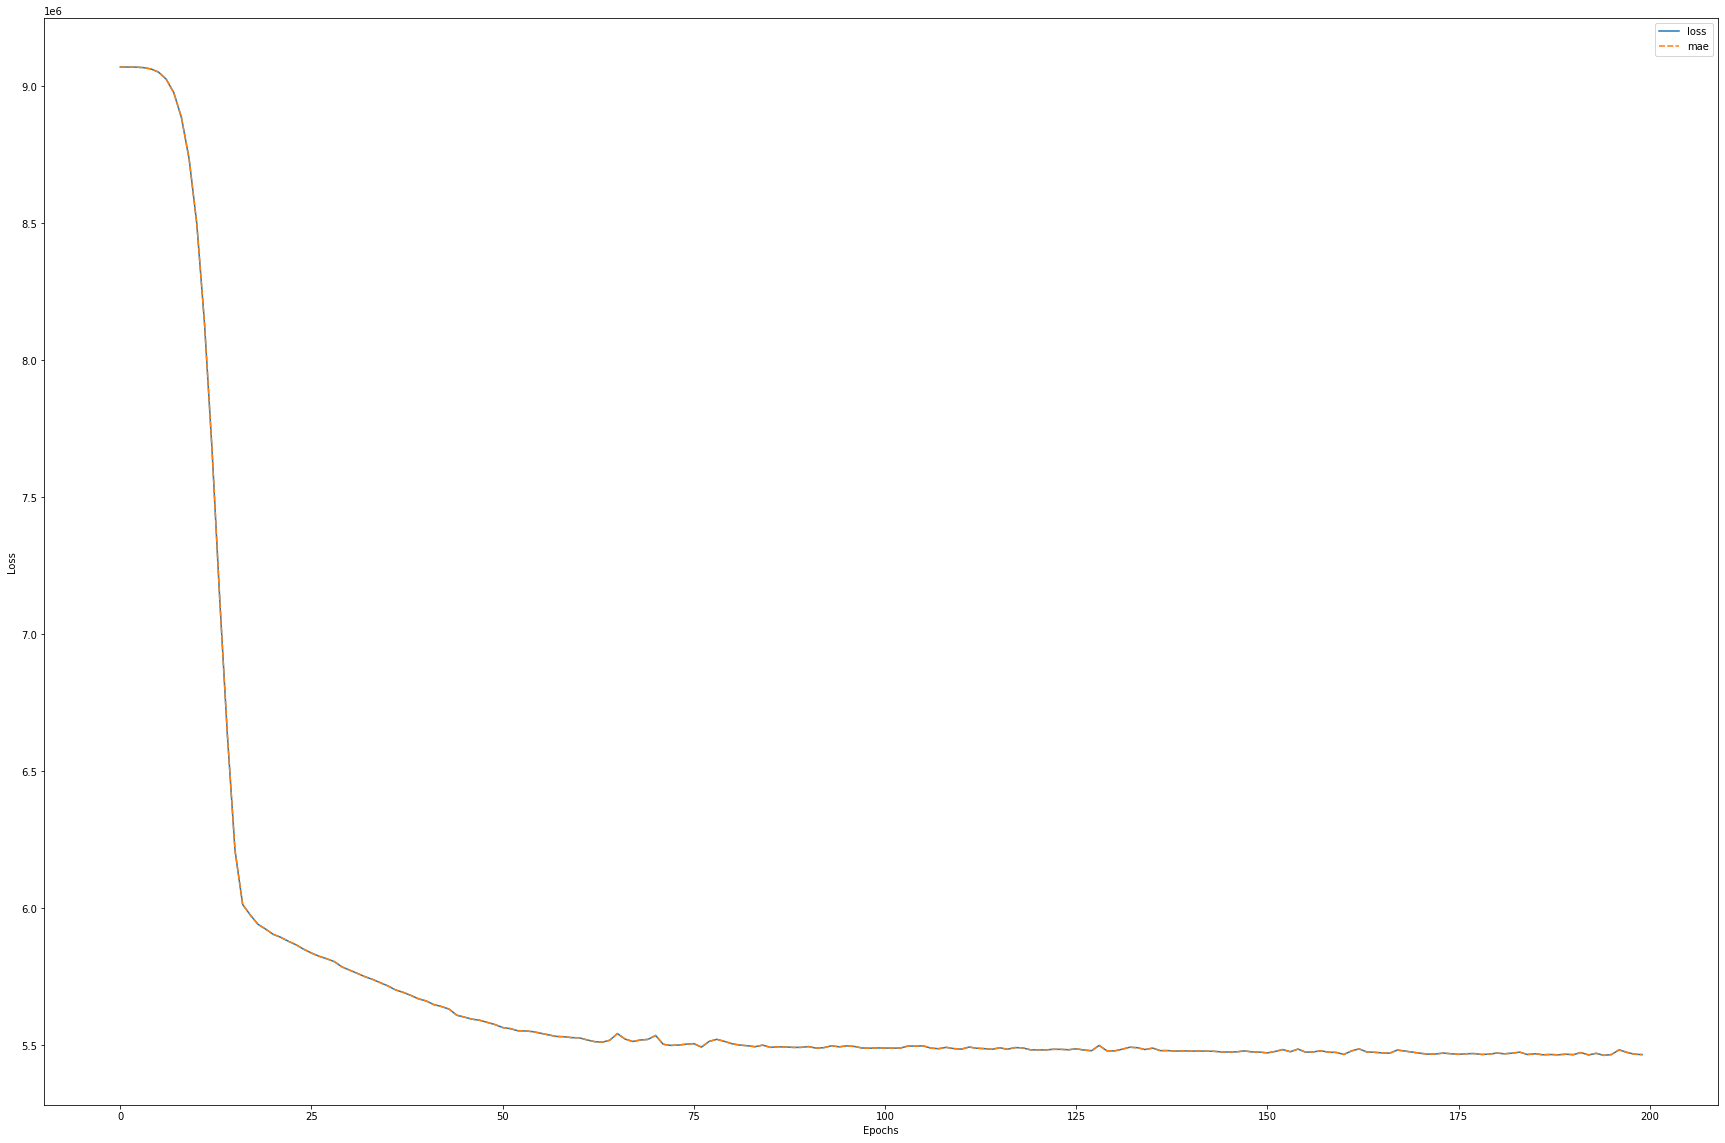

In [52]:
plt.figure(figsize = (30,20))
plt.ylabel('Loss')
plt.xlabel('Epochs')
sns.lineplot(data = fit_data.history)